In [1]:
#!pip install tf-nightly
#!pip install numba==0.53
#!pip install numpy

In [2]:
#!pip install tensorflow-io

In [3]:
import tensorflow.keras as keras
import pandas as pd

In [4]:
dataset=keras.utils.audio_dataset_from_directory('ocean_noise_data', batch_size=32)

Found 487 files belonging to 10 classes.


In [5]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
%matplotlib inline

In [6]:
audio_file='ocean_noise_data/bearded_seal/66038001.wav'

In [7]:
ipd.Audio(audio_file)

In [8]:
#waveform
seal_wave,sr = librosa.load(audio_file)

In [9]:
#waveform
seal_wave,sr = librosa.load(audio_file)

22050


In [10]:
print(seal_wave)

[ 0.05395766 -0.02969466 -0.0845062  ...  0.04735458  0.053809
  0.        ]


In [11]:
seal_wave.shape

(86123,)

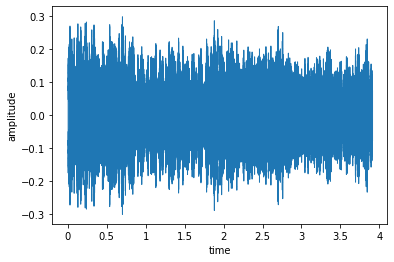

In [12]:
#visualising the waveform
librosa.display.waveshow(seal_wave, sr=sr)
plt.xlabel('time')
plt.ylabel('amplitude')
plt.show()

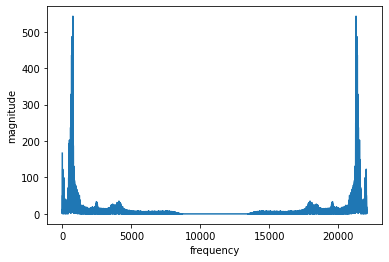

In [13]:
#fft- moving from time domain to frequency domain
fft=np.fft.fft(seal_wave)
magnitude=np.abs(fft)
frequency=np.linspace(0, sr, len(magnitude))
plt.plot(frequency, magnitude)
plt.xlabel('frequency')
plt.ylabel('magnitude')
plt.show()

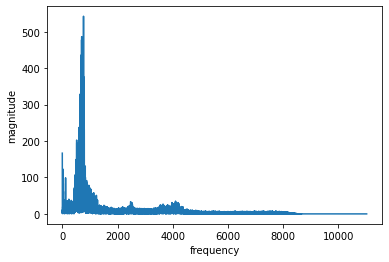

In [14]:
#fft only for the left half of the plot
left_frequency=frequency[:int(len(frequency)/2)]
left_magnitude=magnitude[:int(len(frequency)/2)]
plt.plot(left_frequency, left_magnitude)
plt.xlabel('frequency')
plt.ylabel('magnitude')
plt.show()

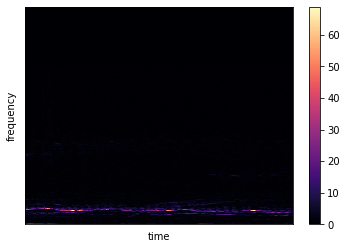

In [15]:
# STFT spectrogram
stft=librosa.core.stft(seal_wave, n_fft=2048, hop_length=512)
spectrogram=np.abs(stft)
librosa.display.specshow(spectrogram, sr=sr, hop_length=512)
plt.xlabel('time')
plt.ylabel('frequency')
plt.colorbar()
plt.show()

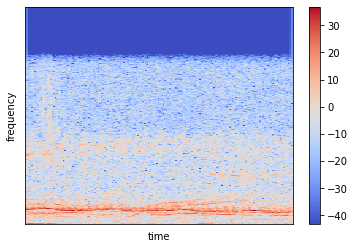

In [16]:
#log spectrogram
log_spectrogram=librosa.amplitude_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=512)
plt.xlabel('time')
plt.ylabel('frequency')
plt.colorbar()
plt.show()

C:\Users\TUKUNA\AppData\Local\Temp/ipykernel_5212/2304038742.py:2: FutureWarning: Pass y=[ 0.05395766 -0.02969466 -0.0845062  ...  0.04735458  0.053809
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc=librosa.feature.mfcc(seal_wave, n_fft=2048, hop_length=512, n_mfcc=13)


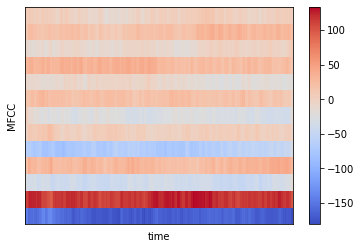

In [17]:
# extracting MFCCs
mfcc=librosa.feature.mfcc(seal_wave, n_fft=2048, hop_length=512, n_mfcc=13)
librosa.display.specshow(mfcc, sr=sr, hop_length=512)
plt.xlabel('time')
plt.ylabel('MFCC')
plt.colorbar()
plt.show()

## CLASSIFICATION

In [18]:
import numpy as np
import json


In [19]:
DATASET_PATH='data.json'
#LOAD THE DATA
def load_data(dataset_path):
    with open(dataset_path, 'r') as fp:
        data=json.load(fp)
    #convert lists to numpy arrays
    inputs = np.array(data['mfcc'])
    targets=np.array(data['labels'])
    
    return inputs, targets


if __name__=='__main__':
    inputs, targets = load_data(DATASET_PATH)

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(inputs, targets, test_size=0.2)

In [23]:
# building the network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(inputs.shape[1], inputs.shape[2])),
    
    #1st hidden layer
    keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.2),
    
    #2nd hidden layer
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.2),
    
    #3rd hidden layer
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.2),
    
    #output layer
    keras.layers.Dense(10, activation='softmax')
])


In [24]:
#compile network
optimizer=keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 572)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               293376    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                16448     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

In [26]:
#training the model
from tensorflow.keras.callbacks import EarlyStopping
#early_stop=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
model.fit(x_train, y_train, 
          validation_data=(x_test,y_test),
         epochs=500,
         batch_size=35)
         #callbacks=[early_stop])

Epoch 1/500
20/20 [==============================] - 6s 61ms/step - loss: 62.7876 - accuracy: 0.2920 - val_loss: 11.3172 - val_accuracy: 0.5824
Epoch 2/500
20/20 [==============================] - 0s 15ms/step - loss: 27.6352 - accuracy: 0.4115 - val_loss: 6.3733 - val_accuracy: 0.6353
Epoch 3/500
20/20 [==============================] - 0s 13ms/step - loss: 19.7781 - accuracy: 0.4292 - val_loss: 6.2457 - val_accuracy: 0.6235
Epoch 4/500
20/20 [==============================] - 0s 13ms/step - loss: 14.2271 - accuracy: 0.4867 - val_loss: 4.6640 - val_accuracy: 0.6471
Epoch 5/500
20/20 [==============================] - 0s 13ms/step - loss: 11.2333 - accuracy: 0.4941 - val_loss: 3.5486 - val_accuracy: 0.6824
Epoch 6/500
20/20 [==============================] - 0s 13ms/step - loss: 10.0978 - accuracy: 0.5044 - val_loss: 3.3610 - val_accuracy: 0.6529
Epoch 7/500
20/20 [==============================] - 0s 13ms/step - loss: 9.4088 - accuracy: 0.5118 - val_loss: 2.7905 - val_accuracy: 0.6941

20/20 [==============================] - 0s 13ms/step - loss: 1.2433 - accuracy: 0.8628 - val_loss: 1.2516 - val_accuracy: 0.8706
Epoch 116/500
20/20 [==============================] - 0s 13ms/step - loss: 1.1097 - accuracy: 0.8909 - val_loss: 1.2254 - val_accuracy: 0.8647
Epoch 117/500
20/20 [==============================] - 0s 13ms/step - loss: 1.1338 - accuracy: 0.8569 - val_loss: 1.2161 - val_accuracy: 0.8941
Epoch 118/500
20/20 [==============================] - 0s 13ms/step - loss: 1.1635 - accuracy: 0.8702 - val_loss: 1.2294 - val_accuracy: 0.8941
Epoch 119/500
20/20 [==============================] - 0s 12ms/step - loss: 1.1287 - accuracy: 0.8702 - val_loss: 1.2811 - val_accuracy: 0.8882
Epoch 120/500
20/20 [==============================] - 0s 13ms/step - loss: 1.1589 - accuracy: 0.8687 - val_loss: 1.2395 - val_accuracy: 0.8647
Epoch 121/500
20/20 [==============================] - 0s 13ms/step - loss: 1.0988 - accuracy: 0.8658 - val_loss: 1.2241 - val_accuracy: 0.8529
Epoch 

Epoch 172/500
20/20 [==============================] - 0s 13ms/step - loss: 0.9183 - accuracy: 0.9351 - val_loss: 1.1169 - val_accuracy: 0.9294
Epoch 173/500
20/20 [==============================] - 0s 12ms/step - loss: 0.9631 - accuracy: 0.9218 - val_loss: 1.1291 - val_accuracy: 0.9294
Epoch 174/500
20/20 [==============================] - 0s 12ms/step - loss: 0.9159 - accuracy: 0.9233 - val_loss: 1.1437 - val_accuracy: 0.9059
Epoch 175/500
20/20 [==============================] - 0s 13ms/step - loss: 0.9321 - accuracy: 0.9263 - val_loss: 1.1075 - val_accuracy: 0.9294
Epoch 176/500
20/20 [==============================] - 0s 13ms/step - loss: 0.9472 - accuracy: 0.9263 - val_loss: 1.1028 - val_accuracy: 0.9294
Epoch 177/500
20/20 [==============================] - 0s 13ms/step - loss: 0.9578 - accuracy: 0.9189 - val_loss: 1.1216 - val_accuracy: 0.9059
Epoch 178/500
20/20 [==============================] - 0s 12ms/step - loss: 0.9014 - accuracy: 0.9322 - val_loss: 1.1223 - val_accuracy:

Epoch 229/500
20/20 [==============================] - 0s 13ms/step - loss: 0.8500 - accuracy: 0.9366 - val_loss: 1.1511 - val_accuracy: 0.9176
Epoch 230/500
20/20 [==============================] - 0s 13ms/step - loss: 0.8361 - accuracy: 0.9410 - val_loss: 1.0872 - val_accuracy: 0.9235
Epoch 231/500
20/20 [==============================] - 0s 13ms/step - loss: 0.8569 - accuracy: 0.9395 - val_loss: 1.1472 - val_accuracy: 0.9235
Epoch 232/500
20/20 [==============================] - 0s 13ms/step - loss: 0.8447 - accuracy: 0.9277 - val_loss: 1.2395 - val_accuracy: 0.9176
Epoch 233/500
20/20 [==============================] - 0s 12ms/step - loss: 0.8239 - accuracy: 0.9484 - val_loss: 1.2462 - val_accuracy: 0.9000
Epoch 234/500
20/20 [==============================] - 0s 13ms/step - loss: 0.8416 - accuracy: 0.9425 - val_loss: 1.0353 - val_accuracy: 0.9294
Epoch 235/500
20/20 [==============================] - 0s 12ms/step - loss: 0.8188 - accuracy: 0.9395 - val_loss: 1.0125 - val_accuracy:

Epoch 286/500
20/20 [==============================] - 0s 13ms/step - loss: 0.7725 - accuracy: 0.9351 - val_loss: 0.9831 - val_accuracy: 0.9000
Epoch 287/500
20/20 [==============================] - 0s 13ms/step - loss: 0.8014 - accuracy: 0.9381 - val_loss: 0.9530 - val_accuracy: 0.9176
Epoch 288/500
20/20 [==============================] - 0s 13ms/step - loss: 0.7866 - accuracy: 0.9425 - val_loss: 1.0437 - val_accuracy: 0.8941
Epoch 289/500
20/20 [==============================] - 0s 13ms/step - loss: 0.7965 - accuracy: 0.9336 - val_loss: 1.0713 - val_accuracy: 0.9000
Epoch 290/500
20/20 [==============================] - 0s 13ms/step - loss: 0.7734 - accuracy: 0.9484 - val_loss: 1.0960 - val_accuracy: 0.9000
Epoch 291/500
20/20 [==============================] - 0s 13ms/step - loss: 0.8024 - accuracy: 0.9454 - val_loss: 1.0654 - val_accuracy: 0.8882
Epoch 292/500
20/20 [==============================] - 0s 13ms/step - loss: 0.7425 - accuracy: 0.9631 - val_loss: 1.0525 - val_accuracy:

Epoch 343/500
20/20 [==============================] - 0s 13ms/step - loss: 0.7305 - accuracy: 0.9454 - val_loss: 1.0055 - val_accuracy: 0.9059
Epoch 344/500
20/20 [==============================] - 0s 13ms/step - loss: 0.7381 - accuracy: 0.9410 - val_loss: 1.0399 - val_accuracy: 0.9000
Epoch 345/500
20/20 [==============================] - 0s 12ms/step - loss: 0.7294 - accuracy: 0.9499 - val_loss: 1.0632 - val_accuracy: 0.9000
Epoch 346/500
20/20 [==============================] - 0s 13ms/step - loss: 0.7057 - accuracy: 0.9631 - val_loss: 1.0887 - val_accuracy: 0.9000
Epoch 347/500
20/20 [==============================] - 0s 13ms/step - loss: 0.7128 - accuracy: 0.9454 - val_loss: 1.1826 - val_accuracy: 0.9118
Epoch 348/500
20/20 [==============================] - 0s 13ms/step - loss: 0.7291 - accuracy: 0.9440 - val_loss: 1.0401 - val_accuracy: 0.9059
Epoch 349/500
20/20 [==============================] - 0s 13ms/step - loss: 0.7185 - accuracy: 0.9484 - val_loss: 0.9493 - val_accuracy:

Epoch 400/500
20/20 [==============================] - 0s 13ms/step - loss: 0.6476 - accuracy: 0.9513 - val_loss: 0.9441 - val_accuracy: 0.9059
Epoch 401/500
20/20 [==============================] - 0s 13ms/step - loss: 0.6346 - accuracy: 0.9631 - val_loss: 1.0168 - val_accuracy: 0.9118
Epoch 402/500
20/20 [==============================] - 0s 13ms/step - loss: 0.6603 - accuracy: 0.9543 - val_loss: 0.9527 - val_accuracy: 0.9118
Epoch 403/500
20/20 [==============================] - 0s 13ms/step - loss: 0.6433 - accuracy: 0.9572 - val_loss: 0.9742 - val_accuracy: 0.9059
Epoch 404/500
20/20 [==============================] - 0s 13ms/step - loss: 0.6430 - accuracy: 0.9646 - val_loss: 0.9367 - val_accuracy: 0.9294
Epoch 405/500
20/20 [==============================] - 0s 13ms/step - loss: 0.6306 - accuracy: 0.9587 - val_loss: 0.9198 - val_accuracy: 0.9235
Epoch 406/500
20/20 [==============================] - 0s 13ms/step - loss: 0.6397 - accuracy: 0.9587 - val_loss: 0.9853 - val_accuracy:

Epoch 457/500
20/20 [==============================] - 0s 13ms/step - loss: 0.5756 - accuracy: 0.9617 - val_loss: 0.9533 - val_accuracy: 0.9235
Epoch 458/500
20/20 [==============================] - 0s 13ms/step - loss: 0.5743 - accuracy: 0.9646 - val_loss: 0.9591 - val_accuracy: 0.9059
Epoch 459/500
20/20 [==============================] - 0s 12ms/step - loss: 0.5867 - accuracy: 0.9572 - val_loss: 1.0092 - val_accuracy: 0.9059
Epoch 460/500
20/20 [==============================] - 0s 13ms/step - loss: 0.5783 - accuracy: 0.9587 - val_loss: 0.9791 - val_accuracy: 0.9000
Epoch 461/500
20/20 [==============================] - 0s 13ms/step - loss: 0.5835 - accuracy: 0.9617 - val_loss: 1.0653 - val_accuracy: 0.9176
Epoch 462/500
20/20 [==============================] - 0s 13ms/step - loss: 0.5855 - accuracy: 0.9617 - val_loss: 1.0610 - val_accuracy: 0.9118
Epoch 463/500
20/20 [==============================] - 0s 13ms/step - loss: 0.5872 - accuracy: 0.9528 - val_loss: 0.9272 - val_accuracy:

In [27]:
losses=pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,62.787594,0.292035,11.317189,0.582353
1,27.635246,0.411504,6.373258,0.635294
2,19.778070,0.429204,6.245696,0.623529
3,14.227082,0.486726,4.663968,0.647059
4,11.233335,0.494100,3.548568,0.682353
...,...,...,...,...
495,0.548542,0.949853,1.022226,0.905882
496,0.535032,0.963127,0.995502,0.905882
497,0.542419,0.960177,0.943844,0.923529
498,0.523729,0.971976,0.939413,0.917647


<AxesSubplot:>

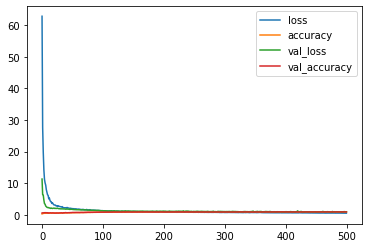

In [28]:
losses.plot()

In [29]:
yestimated=model.predict(x_test)
yestimated

6/6 [==============================] - 0s 6ms/step


array([[1.08404225e-14, 1.11207919e-05, 9.99988914e-01, ...,
        1.10421893e-27, 8.65995961e-24, 1.68853115e-12],
       [1.03900308e-22, 9.63070739e-24, 2.17948031e-31, ...,
        1.09852587e-34, 1.17230194e-31, 3.64290741e-22],
       [6.46743325e-15, 2.97354406e-14, 1.51699576e-13, ...,
        1.41854254e-27, 2.43102647e-22, 2.86057094e-12],
       ...,
       [2.10540591e-12, 4.73167417e-23, 3.82645803e-27, ...,
        4.58450428e-23, 1.00000000e+00, 4.59042597e-35],
       [5.74217118e-10, 2.29244206e-12, 2.49445575e-10, ...,
        1.88993823e-07, 1.36450042e-12, 9.99995828e-01],
       [1.09113444e-07, 3.59456465e-08, 5.37088241e-08, ...,
        1.06273625e-07, 2.26084248e-05, 3.17814710e-07]], dtype=float32)

In [31]:
model.evaluate(x_test, y_test, verbose=0, return_dict=True)

{'loss': 0.9338122010231018, 'accuracy': 0.9235293865203857}